In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
raw_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
raw_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
raw_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
raw_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Eksplorasi Data

In [4]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Cek Data Duplikat

In [6]:
raw_train.duplicated().any()

False

In [7]:
raw_train.duplicated().any()

False

Tidak ada data duplikat pada dataframe `raw_train` dan `raw_test`.

## Analisis Variable Target

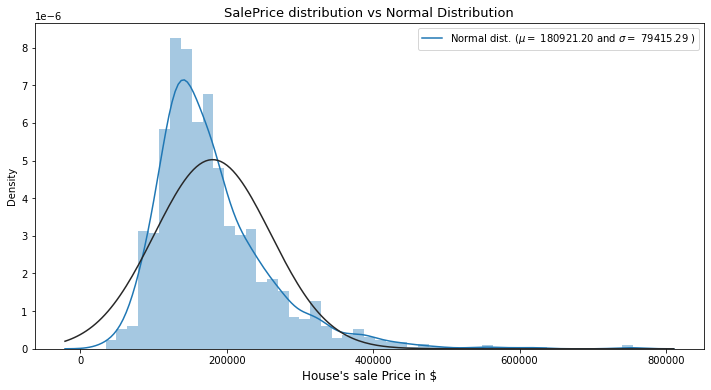

In [8]:
(mu, sigma) = norm.fit(raw_train['SalePrice'])

plt.figure(figsize = (12,6))
sns.distplot(raw_train['SalePrice'], kde=True, fit=norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

In [9]:
print('Skewness: %.2f' % (raw_train['SalePrice']).skew())
print('Kurtosis: %.2f' % (raw_train['SalePrice']).kurt())

Skewness: 1.88
Kurtosis: 6.54


Distibusi variabel target `SalePrice` _right skew_ dengan nilai _skewness_ 1,88 dan _Kurtosis_ 6,54. Dalam kasus regresi, pemodelan akan menjadi lebih baik jika data yang digunakan _train_ model merupakan distribusi normal. Oleh karena itu, perlu dilakukan normalisasi pada `SalePrice`. Normalisasi tersebut akan dilakukan pada saat _preprocessing_ data.

## Korelasi Antar Variabel

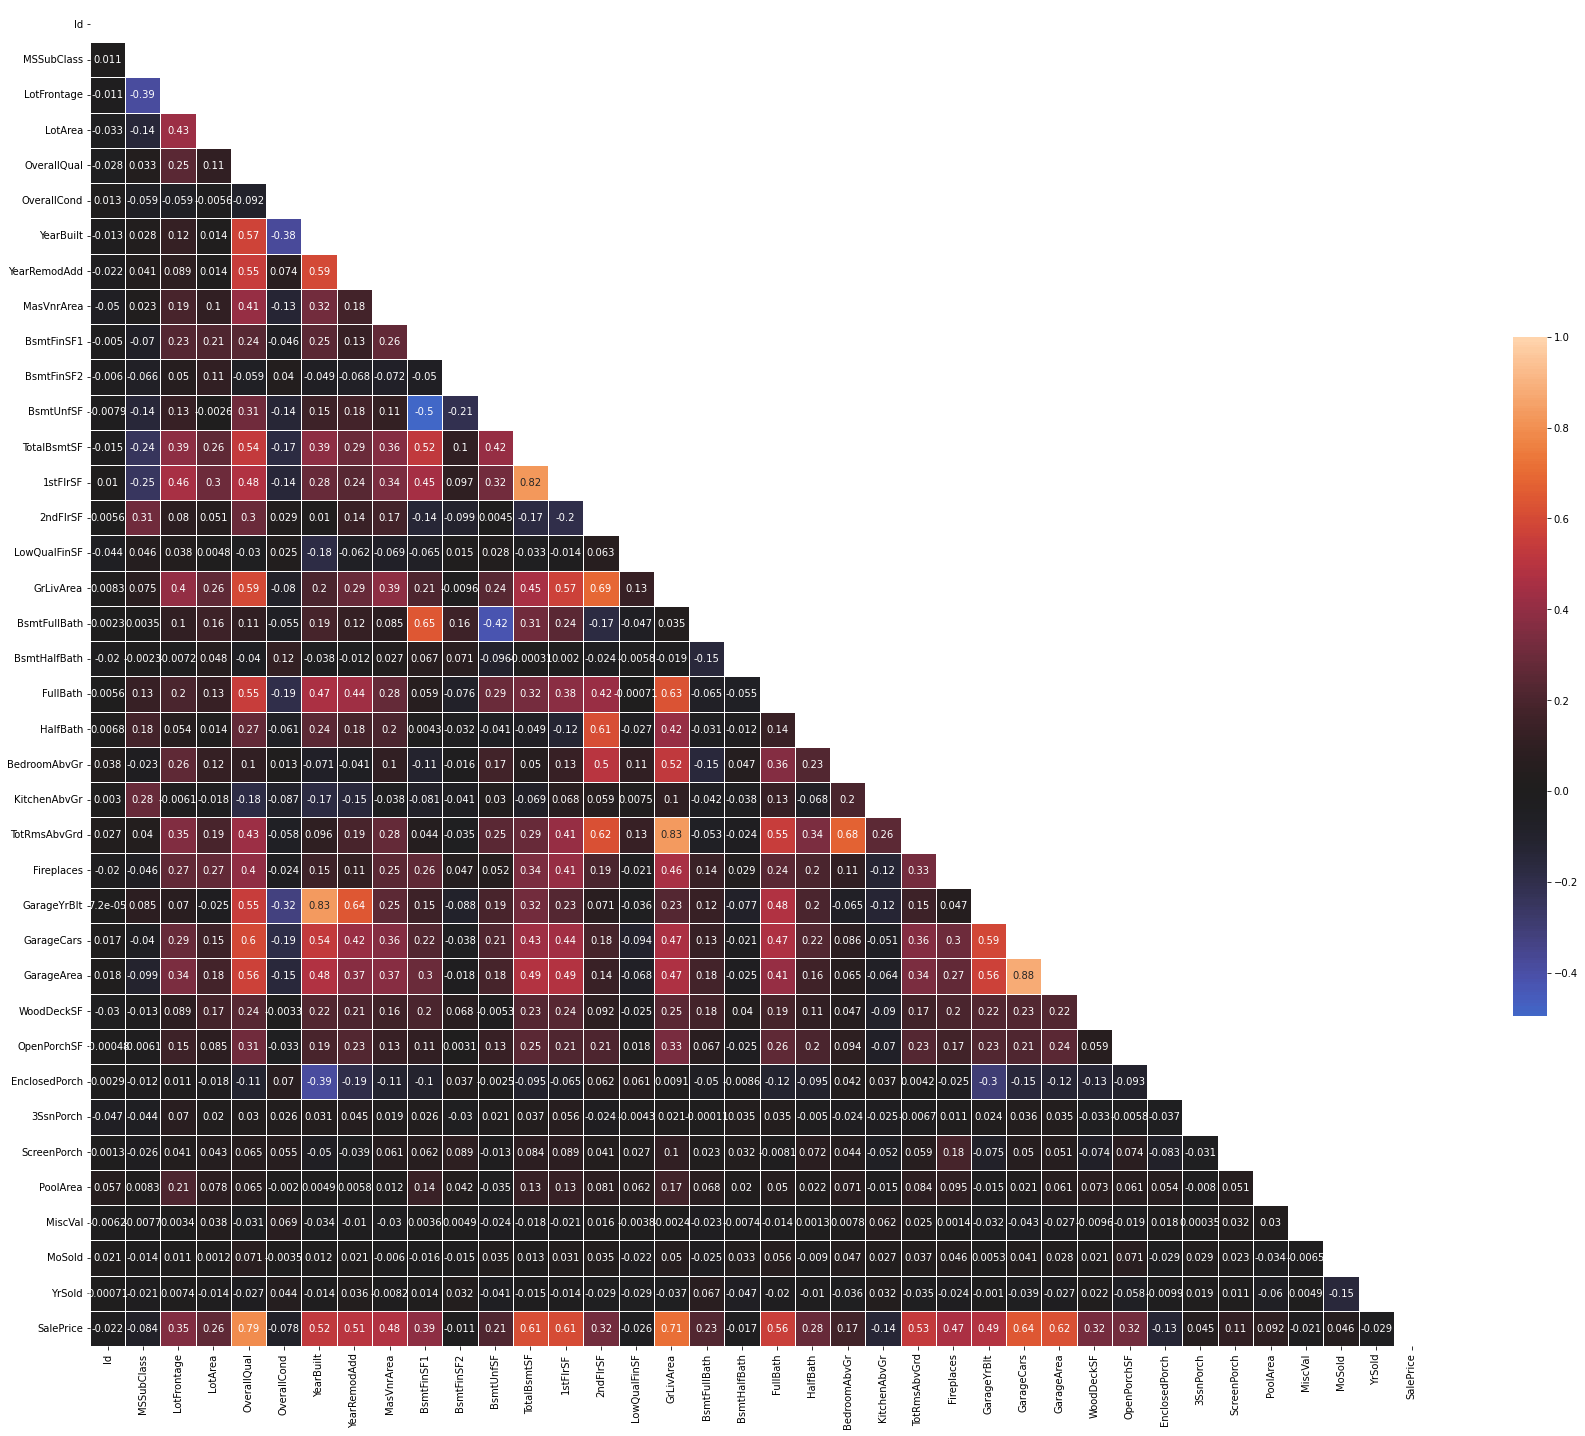

In [10]:
plt.subplots(figsize=(30, 25))
data=raw_train.corr()
mask = np.triu(np.ones_like(data, dtype=bool))
sns.heatmap(data, 
            mask=mask, 
            vmax=1, 
            center=0, 
            annot = True,
            square=True, 
            linewidths=.5,
            cbar_kws={"shrink": .5})
plt.show()

Variabel Target `SalePrice` memiliki korelasi kuat dengan `OverallQual`, `GrLivArea`, `GarageCars`, `GarageArea`, `TotalBsmtSF`, dan `1stFlrSF`.

## Cek Outlier

### Univariate Analysis
Univariate Analysis dilakukan pada variabel target `SalePrice`.

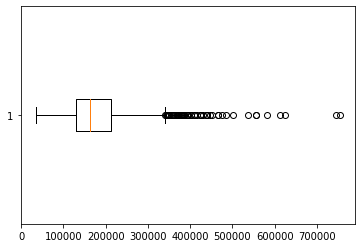

In [11]:
plt.boxplot(raw_train.SalePrice, vert=False)
plt.show()

Dua data di sebelah kanan terliat seperti outlier, tetapi perlu dilakukan juga _Bivariate Analysis_ untuk lebih memastikannya.

### Bivariate Analysis
Berdasarkan korelasi antar variabel, `SalePrice` memiliki korelasi kuat dengan `OverallQual`, `GrLivArea`, `GarageCars`, `GarageArea`, `TotalBsmtSF`, dan `1stFlrSF`.

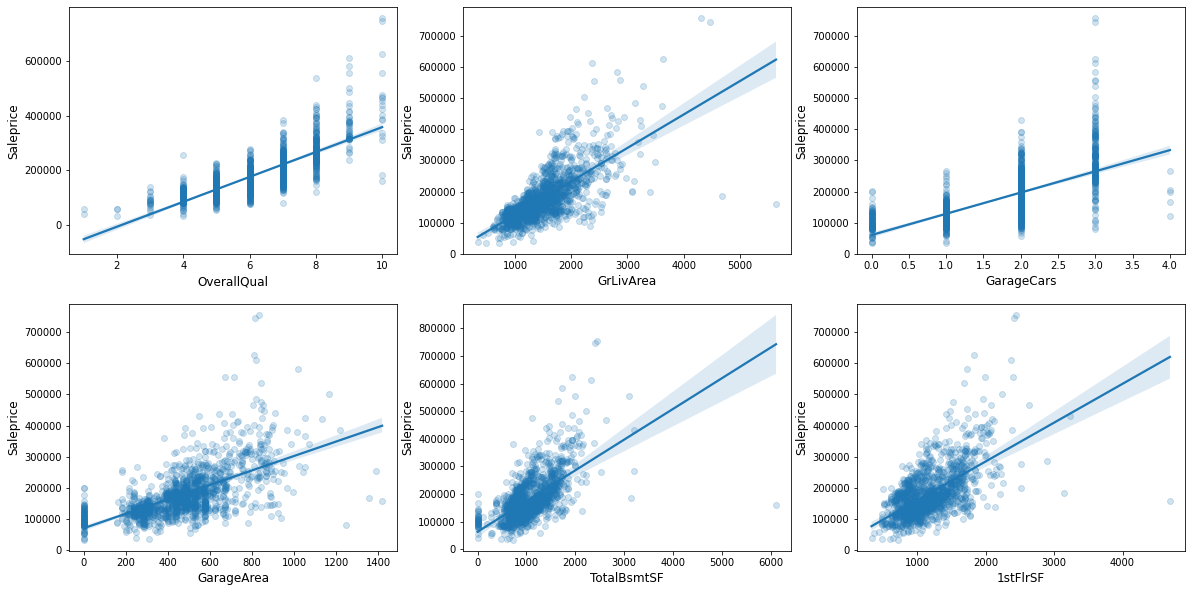

In [12]:
bi = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

plt.figure(figsize=(20,10))

for i, col in enumerate(bi):
    plt.subplot(2,3, (i+1))
    sns.regplot(x=col, y='SalePrice', data=raw_train, scatter_kws={'alpha':0.2})
    plt.xlabel(f'{col}', size=12)
    plt.ylabel('Saleprice', size=12)

plt.show()

Pada grafik `GrLivArea` vs. `Saleprice` terdapat dua data dimana memiliki nilai `GrLivArea` yang besar, tetapi `SalePrice`-nya kecil. Kedua data tersebut merupakan outlier dan akan dihapus dari dataframe.

In [13]:
raw_train.drop(raw_train[(raw_train.GrLivArea > 4000) & (raw_train.SalePrice < 500000)].index, inplace=True)

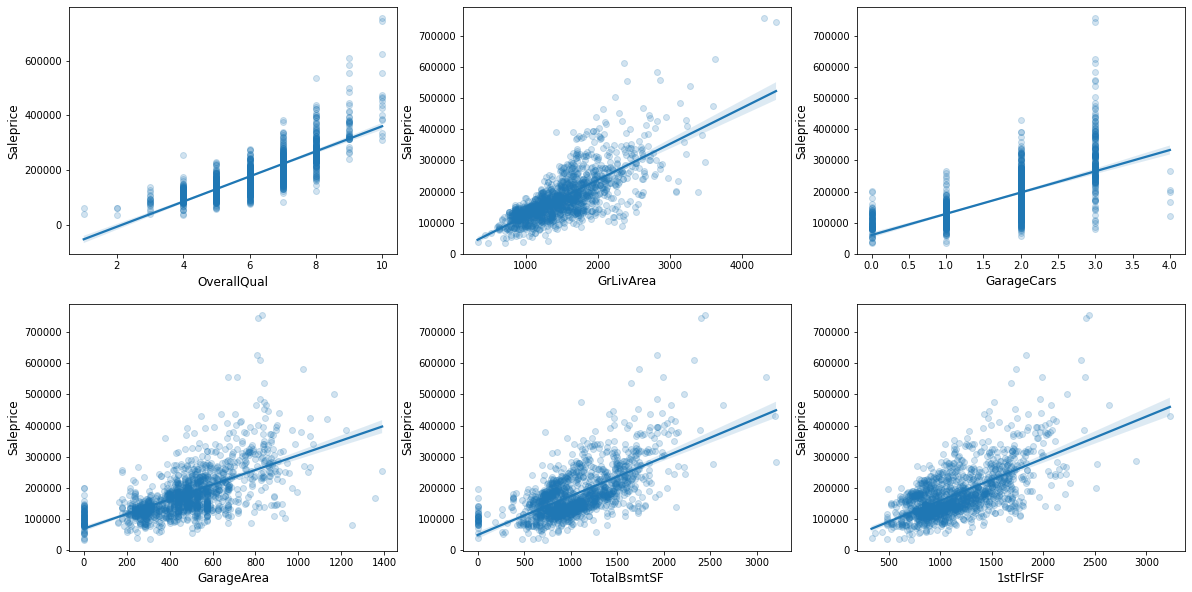

In [14]:
plt.figure(figsize=(20,10))

for i, col in enumerate(bi):
    plt.subplot(2,3, (i+1))
    sns.regplot(x=col, y='SalePrice', data=raw_train, scatter_kws={'alpha':0.2})
    plt.xlabel(f'{col}', size=12)
    plt.ylabel('Saleprice', size=12)

plt.show()

# Data Preprocessing

In [15]:
# Memisahkan variable target dari training data
y = raw_train.SalePrice
raw_train.drop('SalePrice', axis=1, inplace=True)

# Menggabungkan train & test
all_data = pd.concat((raw_train,raw_test))

## Normalisasi Variabel Target

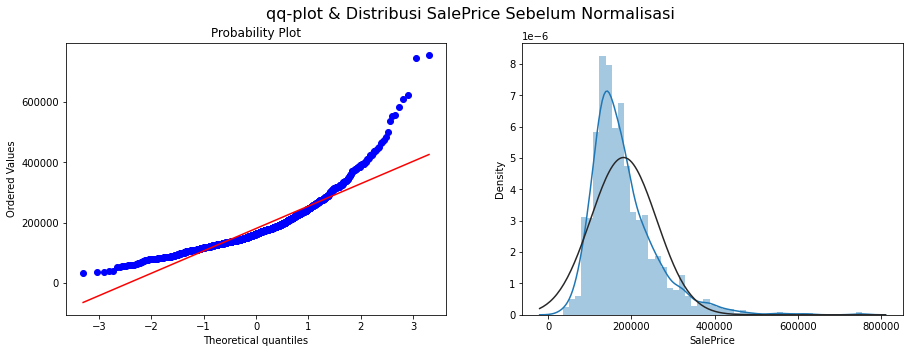

In [16]:
plt.subplots(figsize= (15,5))
plt.suptitle("qq-plot & Distribusi SalePrice Sebelum Normalisasi", fontsize= 16)

plt.subplot(1,2,1)
stats.probplot(y, plot=plt)

plt.subplot(1,2,2)
sns.distplot(y, kde = True, hist=True, fit = norm)
plt.show()

In [17]:
y = np.log1p(y)

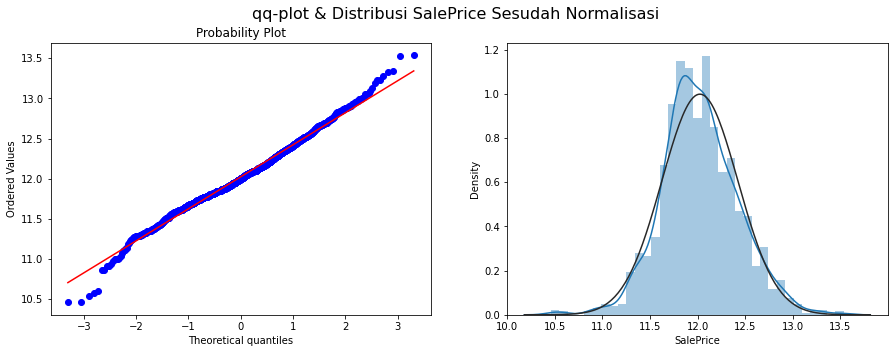

In [18]:
plt.subplots(figsize= (15,5))
plt.suptitle("qq-plot & Distribusi SalePrice Sesudah Normalisasi", fontsize= 16)

plt.subplot(1,2,1)
stats.probplot(y, plot=plt)

plt.subplot(1,2,2)
sns.distplot(y, kde = True, hist=True, fit = norm)
plt.show()

## Menangani _Missing Value_

In [19]:
all_data_null = (all_data.isna().sum())/len(all_data)*100
all_data_null = all_data_null.drop(all_data_null[all_data_null == 0].index).sort_values(ascending=False)
all_data_null

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageFinish     5.450806
GarageQual       5.450806
GarageCond       5.450806
GarageYrBlt      5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
Functional       0.068564
Utilities        0.068564
GarageArea       0.034282
GarageCars       0.034282
Electrical       0.034282
KitchenQual      0.034282
TotalBsmtSF      0.034282
BsmtUnfSF        0.034282
BsmtFinSF2       0.034282
BsmtFinSF1       0.034282
Exterior2nd      0.034282
Exterior1st      0.034282
SaleType         0.034282
dtype: float64

In [20]:
# Categorical data -> missing value kemungkinan besar karena tidak ada
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'):
    all_data[col].fillna('None', inplace=True)

# Numberic data
all_data.LotFrontage = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Categorical data (Garage) -> missing value kemungkinan besar karena tidak ada garasi
for gara_cate in ('GarageFinish', 'GarageQual', 'GarageCond', 'GarageType'):
    all_data[gara_cate].fillna('None', inplace=True)

# Numberic data (Garage) -> missing value kemungkinan besar karena tidak ada garasi
for gara_num in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[gara_num].fillna(0, inplace=True)
    
# Categorical data (Basement) -> missing value kemungkinan besar karena tidak ada basement
for base_cate in ('BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1'):
    all_data[base_cate].fillna('None', inplace=True)

# Numerical data (Basement) -> missing value kemungkinan besar karena tidak ada basement
for base_num in ('BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1'):
    all_data[base_num].fillna(0, inplace=True)
    
all_data.MasVnrType.fillna('None', inplace=True)
all_data.MasVnrArea.fillna(0, inplace=True)

all_data.MSZoning.fillna(all_data.MSZoning.mode()[0], inplace=True)

all_data.drop('Utilities', axis=1, inplace=True)

all_data.Functional.fillna('Typ', inplace=True)

all_data.Exterior1st.fillna(all_data.Exterior1st.mode()[0], inplace=True)
all_data.Exterior2nd.fillna(all_data.Exterior2nd.mode()[0], inplace=True)

all_data.Electrical.fillna(all_data.Electrical.mode()[0], inplace=True)

all_data.KitchenQual.fillna(all_data.KitchenQual.mode()[0], inplace=True)

all_data.SaleType.fillna(all_data.SaleType.mode()[0], inplace=True)

In [21]:
all_data.isna().sum().any()

False

## Rekayasa Fitur

In [22]:
all_data["AreaperRoom"] = all_data["GrLivArea"] / (all_data["TotRmsAbvGrd"] +
                                                   all_data["FullBath"] +
                                                   all_data["HalfBath"])

all_data['Age'] = all_data['YrSold'] - all_data['YearBuilt']

all_data['HouseRating'] = all_data['OverallQual']*all_data['OverallCond']

In [23]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [24]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2917 non-null   int64  
 1   MSSubClass     2917 non-null   object 
 2   MSZoning       2917 non-null   object 
 3   LotFrontage    2917 non-null   float64
 4   LotArea        2917 non-null   int64  
 5   Street         2917 non-null   object 
 6   Alley          2917 non-null   object 
 7   LotShape       2917 non-null   object 
 8   LandContour    2917 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

## Menangani Distribusi Fitur yang _Skew_

In [25]:
#log transform skewed numeric features:
num_fea = [fea for fea in all_data.columns if all_data[fea].dtype != 'object']

skewed_fea = all_data[num_fea][:1456].apply(lambda x: skew(x)) #compute skewness
skewed_fea = skewed_fea[skewed_fea > 0.75]
skewed_fea = skewed_fea.index
skewed_fea

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'AreaperRoom'],
      dtype='object')

In [26]:
all_data[skewed_fea] = np.log1p(all_data[skewed_fea])

## Encoding Fitur Kategori

### Kategori Ordinal

In [27]:
from sklearn.preprocessing import OrdinalEncoder

ord_fea = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
           'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
           'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

ord_cate_1 = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_cate_2 = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_cate_3 = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_cate_4 = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_cate_5 = ['None', 'No', 'Mn', 'Av', 'Gd']
ord_cate_6 = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ord_cate_7 = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ord_cate_8 = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_cate_9 = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_cate_10 = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_cate_11 = ['None', 'Unf', 'RFn', 'Fin']
ord_cate_12 = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_cate_13 = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_cate_14 = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_cate_15 = ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']

all_data_enc = all_data.copy()

ordinal_enc = OrdinalEncoder(
    categories=[ord_cate_1, ord_cate_2, ord_cate_3, ord_cate_4, ord_cate_5, 
                ord_cate_6, ord_cate_7, ord_cate_8, ord_cate_9, ord_cate_10,
                ord_cate_11, ord_cate_12, ord_cate_13, ord_cate_14, ord_cate_15])

all_data_enc[ord_fea] = ordinal_enc.fit_transform(all_data_enc[ord_fea])

### Non-Ordinal

In [28]:
all_data_enc = pd.get_dummies(all_data_enc)

# Pemodelan

In [29]:
# Memisahkan train dan test
X = all_data_enc[:1458]
X_sub = all_data_enc[1458:]

test_id = X_sub.Id

X.drop('Id', axis=1, inplace=True)
X_sub.drop('Id', axis=1, inplace=True)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from catboost import Pool

## Base Model

In [31]:
model_lr = LinearRegression()
model_gb = GradientBoostingRegressor(learning_rate=0.2, min_samples_split=20, max_leaf_nodes=32)

In [32]:
def cross_valid(model):
    scores = np.sqrt(-1 * cross_val_score(model, X, y,
                                  cv=5,
                                  scoring='neg_mean_squared_error'))
    print("RMSE scores:\n", scores)
    print(f"Mean RMSE scores: {scores.mean()} ({scores.std()})" )

## Linear Regression

In [33]:
cross_valid(model_lr)

RMSE scores:
 [0.11745575 0.12854057 0.13004349 0.1149374  0.12301338]
Mean RMSE scores: 0.12279811728003154 (0.005930416736228768)


## Gradient Boosting

In [34]:
parameter = {
    'learning_rate': [0.1, 0.15, 0.2],
    'min_samples_split' : list(np.arange(8,21,2)),
    'max_leaf_nodes' : list(np.arange(8, 33, 8))
            }

gb = GridSearchCV(GradientBoostingRegressor(), parameter, n_jobs=-1, verbose=1)
gb.fit(X, y)

print(f'Best parameter = {gb.best_params_}')

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best parameter = {'learning_rate': 0.15, 'max_leaf_nodes': 16, 'min_samples_split': 14}


In [35]:
gb_opt = GradientBoostingRegressor(learning_rate=gb.best_params_['learning_rate'], 
                                   max_leaf_nodes=gb.best_params_['max_leaf_nodes'], 
                                   min_samples_split=gb.best_params_['min_samples_split'])
cross_valid(gb_opt)

RMSE scores:
 [0.10990962 0.12596945 0.13043421 0.10815145 0.11786539]
Mean RMSE scores: 0.11846602478918704 (0.008712084496398455)


## CatBoosting

In [36]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state=42)

cat = CatBoostRegressor()
cat.fit(X_train, y_train,
        eval_set = (X_val,y_val),
        plot=True,
        verbose = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [37]:
cat_pred = cat.predict(X_val)
cat_score = np.sqrt(mean_squared_error(y_val, cat_pred))
cat_score

0.113403069313863

In [38]:
shap_cat = cat.get_feature_importance(Pool(X, y), type='ShapValues')
shap_cat

array([[-5.08460184e-03, -3.04807491e-03,  4.23226691e-02, ...,
        -1.93064310e-04, -1.10986263e-03,  1.20234480e+01],
       [ 1.04331236e-02,  1.04123459e-04, -3.66764296e-02, ...,
         1.09120516e-03, -5.44330538e-04,  1.20234480e+01],
       [-8.97876271e-03,  9.32511396e-03,  3.58844737e-02, ...,
        -6.16144722e-04, -1.10986263e-03,  1.20234480e+01],
       ...,
       [-9.33775423e-03, -1.15841055e-02,  3.41313172e-02, ...,
         2.92249367e-04, -5.43854503e-04,  1.20234480e+01],
       [-8.60208767e-03,  1.71471719e-03, -4.78491928e-02, ...,
         5.43499967e-04, -8.12887972e-04,  1.20234480e+01],
       [ 1.26607022e-02, -1.09434111e-03, -4.37918680e-02, ...,
         6.97156608e-04, -8.12887972e-04,  1.20234480e+01]])

In [39]:
y_pred = cat.predict(X_sub)

In [40]:
y_sub = np.expm1(y_pred)
d_stack = {'Id': test_id, 'SalePrice': y_sub}
submission = pd.DataFrame(data=d_stack)
submission

,Id,SalePrice
0,1461,120717.128394
1,1462,158066.774792
2,1463,187782.883351
3,1464,196981.611794
4,1465,192878.669664
...,...,...
1454,2915,80978.391855
1455,2916,82317.387910
1456,2917,157876.786746
1457,2918,114022.459291


In [41]:
submission.to_csv('House_price_submission.csv', index=False)